In [1]:
import pandas as pd
import numpy as np

In [2]:
# 압축해제를 위한 라이브러리
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/apple/apple.zip", "r")

In [3]:
zip_ref.extractall("/content/drive/MyDrive/apple/apple/")
zip_ref.close()

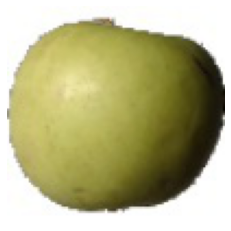

In [4]:
# 이미지 확인
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

img = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/apple/apple/fruits-360_dataset/fruits-360/Training/Apple Golden 3/0_100.jpg")

plt.imshow(img)
plt.axis("off")
plt.show()

In [5]:
# Train data와 Test data의 데이터세트 경로 저장
train_data_dir =  "/content/drive/MyDrive/apple/apple/fruits-360_dataset/fruits-360/Training"
test_data_dir =  "/content/drive/MyDrive/apple/apple/fruits-360_dataset/fruits-360/Test"

In [6]:
batch_size=32
img_height=100
img_width=100

In [7]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_data_dir,
                                                           validation_split=0.3,
                                                           subset="training",
                                                           seed=1,
                                                           image_size=(img_height, img_width),
                                                           batch_size=batch_size)

Found 67692 files belonging to 131 classes.
Using 47385 files for training.


In [8]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(train_data_dir,
                                                           validation_split=0.3,
                                                           subset="validation",
                                                           seed=1,
                                                           image_size=(img_height, img_width),
                                                           batch_size=batch_size)

Found 67692 files belonging to 131 classes.
Using 20307 files for validation.


In [9]:
class_names=train_ds.class_names
print(class_names)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [10]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory(test_data_dir,
                                                           seed=1,
                                                           image_size=(img_height, img_width),
                                                           batch_size=batch_size)

Found 22688 files belonging to 131 classes.


In [11]:
test_ds1=tf.keras.preprocessing.image_dataset_from_directory(test_data_dir,
                                                           seed=1,
                                                           image_size=(img_height, img_width),
                                                           batch_size=batch_size,
                                                           shuffle=False)

Found 22688 files belonging to 131 classes.


In [13]:
#shuffle=True
y=np.concatenate([y for x,y in test_ds], axis=0)
print(y)

[ 91   8 117 ...  40   6   2]


In [14]:
#shuffle=False
y=np.concatenate([y for x,y in test_ds1], axis=0)
print(y)

[  0   0   0 ... 130 130 130]


In [15]:
x=np.concatenate([x for x,y in test_ds1], axis=0)

print(x[0])

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


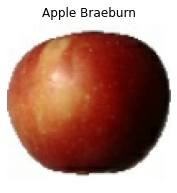

In [17]:
plt.figure(figsize=(3,3))
plt.imshow(x[0].astype("uint8"))
plt.title(class_names[y[0]])
plt.axis("off")
plt.show()

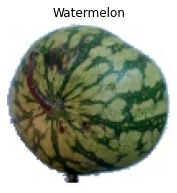

In [18]:
plt.figure(figsize=(3,3))
plt.imshow(x[-1].astype("uint8"))
plt.title(class_names[y[-1]])
plt.axis("off")
plt.show()

In [19]:
# test_ds1을 제외하고 나머지 데이터세트를 Prefetch 세트로 설정
BUFFER_SIZE=10000
AUTOTUNE= tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(BUFFER_SIZE).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [22]:
# CNN 모델 구성

num_classes=131
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),

    layers.Conv2D(16,3, padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Dropout(.50),

    layers.Conv2D(16,3, padding="same", activation="relu"),
    layers.MaxPooling2D(2),

    layers.Dropout(.50),

    layers.Flatten(),
    
    layers.Dense(128, activation="relu"),
    layers.Dropout(.50),
    layers.Dense(num_classes, activation="softmax")
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                    

In [25]:
# 모델 컴파일
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [28]:
# 모델 학습
from tensorflow import keras
from keras.callbacks import ModelCheckpoint

cp=ModelCheckpoint("CNN_fruits.h5", save_best_only=True)
es=keras.callbacks.EarlyStopping(patience=5,
                                                monitor="val_accuracy",
                                                restore_best_weights=True)


epoch=20

history=model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    epochs=epoch,
    callbacks=[cp, es]
)

Epoch 1/20
1481/1481 [==============================] - 66s 32ms/step - loss: 3.6312 - accuracy: 0.1139 - val_loss: 2.2192 - val_accuracy: 0.5193
Epoch 2/20
1481/1481 [==============================] - 42s 28ms/step - loss: 2.9007 - accuracy: 0.1926 - val_loss: 1.7656 - val_accuracy: 0.6711
Epoch 3/20
1481/1481 [==============================] - 42s 28ms/step - loss: 2.7415 - accuracy: 0.2244 - val_loss: 1.5939 - val_accuracy: 0.6488
Epoch 4/20
1481/1481 [==============================] - 42s 28ms/step - loss: 2.3981 - accuracy: 0.2993 - val_loss: 1.1380 - val_accuracy: 0.8107
Epoch 5/20
1481/1481 [==============================] - 42s 28ms/step - loss: 2.0895 - accuracy: 0.3637 - val_loss: 0.9492 - val_accuracy: 0.8434
Epoch 6/20
1481/1481 [==============================] - 42s 28ms/step - loss: 1.8756 - accuracy: 0.4227 - val_loss: 0.8446 - val_accuracy: 0.8416
Epoch 7/20
1481/1481 [==============================] - 42s 28ms/step - loss: 1.6869 - accuracy: 0.4713 - val_loss: 0.5266 -

In [ ]:
# loss: 0.5654 - accuracy: 0.8077 - val_loss: 0.0858 - val_accuracy: 0.9889

Text(0.5, 1.0, 'Training and Validation Accuracy')

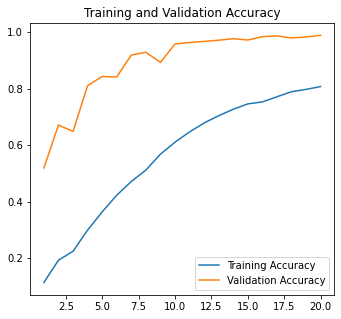

In [34]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss= history.history["val_loss"]
epochs_range =range(1,20+1)


# train accuracy & validation accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

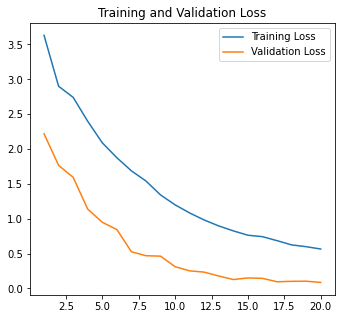

In [35]:
# train loss & validation loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

In [36]:
model.load_weights("CNN_fruits.h5")

In [38]:
#test_ds 를 사용하여 model evaluation
test_loss, test_acc = model.evaluate(test_ds)

print("Test Loss :", test_loss)
print("Test Accuracy:", test_acc)

709/709 [==============================] - 10s 14ms/step - loss: 0.2490 - accuracy: 0.9415
Test Loss : 0.248959481716156
Test Accuracy: 0.9415109157562256


In [46]:
# Prediction
pred = model.predict(test_ds1)
score = tf.nn.softmax(pred[-42])

print(
    "This image most likely belongs to {} with a {:2f} percent confidence".format(class_names[np.argmax(score)], np.max(score)*100)
)

709/709 [==============================] - 9s 13ms/step
This image most likely belongs to Watermelon with a 2.048142 percent confidence


In [48]:
model.save("CNN_fruits_finish.h5")